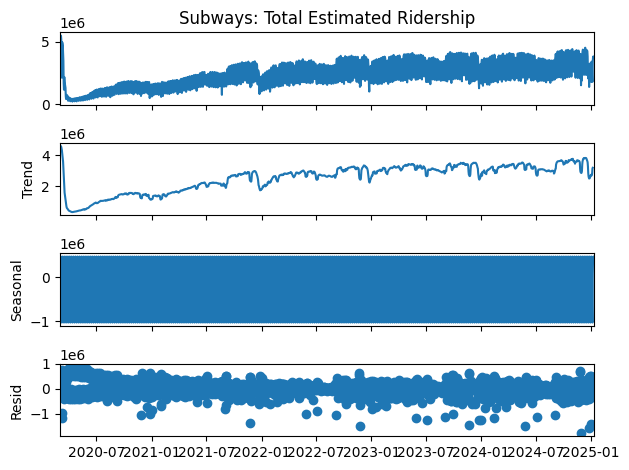

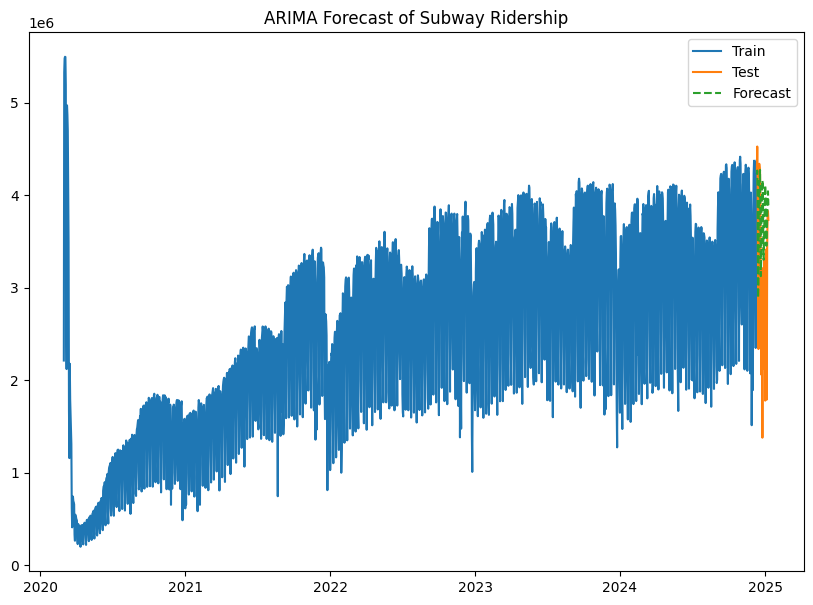

Mean Absolute Error: 704539.37
Mean Squared Error: 984965915115.86


In [7]:
# Time Series Analysis & Forecasting

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 2: Load and prepare data
url = 'https://data.ny.gov/api/views/vxuj-8kew/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url, parse_dates=['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('D')

# Focus on subway ridership
df['Subways: Total Estimated Ridership'] = pd.to_numeric(df['Subways: Total Estimated Ridership'], errors='coerce')
df = df.dropna(subset=['Subways: Total Estimated Ridership'])

# Step 3: Decompose time series
result = seasonal_decompose(df['Subways: Total Estimated Ridership'], model='additive', period=7)
result.plot()
plt.tight_layout()
plt.show()

# Step 4: Fit ARIMA model
train = df['Subways: Total Estimated Ridership'][:-30]
test = df['Subways: Total Estimated Ridership'][-30:]

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

# Step 5: Evaluate forecast
plt.figure(figsize=(10, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Forecast of Subway Ridership')
plt.show()

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")



---

###  **Mean Absolute Error (MAE): 704,539.37**

- **Definition**: The average absolute difference between actual ridership and forecasted ridership.
- **Interpretation**: On average, the ARIMA model's predictions were off by **~704,539 riders per day**.
- **Context**: If daily ridership is usually in the **2–5 million range**, an MAE of ~700K suggests the model is moderately inaccurate — especially for fine-grained short-term forecasting.

---

###  **Mean Squared Error (MSE): 984,965,915,115.86**

- **Definition**: The average of the squared differences between predicted and actual values.
- **Interpretation**: This large number reflects the **magnitude of large prediction errors**, since squaring amplifies the effect of big misses.
- **Usefulness**: MSE is more sensitive to large errors than MAE. It's useful if you want to penalize big mistakes heavily — but it's less interpretable directly than MAE.

---

###  Why the Errors Are High

1. **Volatility**: MTA ridership is **highly variable**, impacted by:
   - Holidays
   - COVID-19 waves
   - Weather
   - Work-from-home patterns

2. **Model Simplicity**: The ARIMA(5,1,0) model may be too simple and doesn't:
   - Include exogenous variables (like day-of-week, COVID cases, holidays)
   - Adapt to **recent non-stationary trends**

3. **Decomposition Noise**: the seasonal component in the decomposition appears unusually flat or chaotic — possibly due to irregularities in the data’s periodicity (e.g., holidays breaking seasonality).

---


